In [2]:
# data
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
#from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [ ]:
import os
import os
import pm4py
import pandas as pd
os.environ["PATH"] += os.pathsep + 'C:/Users/' +  os.getlogin() + '/Downloads/graphviz_5.0/graphviz_5.0/Graphviz/bin/'

df = pd.read_csv(r'flights.csv')

pm4py.format_dataframe(df, case_id='Flight', activity_key='Activity ', timestamp_key='Timestamp')

df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')
log = log_converter.apply(df)

In [7]:
df

,Flight,Activity,Timestamp,City,case:concept:name,concept:name,time:timestamp
48,TR320,Check-in,2019-01-12 12:01:00+00:00,Munich,TR320,Check-in,2019-01-12 12:01:00+00:00
65,TR320,Boarding,2019-01-12 12:45:00+00:00,Munich,TR320,Boarding,2019-01-12 12:45:00+00:00
3,TR320,Take off,2019-01-12 13:03:00+00:00,Munich,TR320,Take off,2019-01-12 13:03:00+00:00
27,TR320,Landing,2019-01-12 22:05:00+00:00,New York,TR320,Landing,2019-01-12 22:05:00+00:00
82,TR320,Baggage claim,2019-01-12 23:00:00+00:00,New York,TR320,Baggage claim,2019-01-12 23:00:00+00:00
...,...,...,...,...,...,...,...
58,LH2306,Check-in,2019-07-20 13:58:00+00:00,Munich,LH2306,Check-in,2019-07-20 13:58:00+00:00
44,LH2306,Delay announcement,2019-07-20 14:20:00+00:00,Munich,LH2306,Delay announcement,2019-07-20 14:20:00+00:00
74,LH2306,Boarding,2019-07-20 14:23:00+00:00,Munich,LH2306,Boarding,2019-07-20 14:23:00+00:00
11,LH2306,Take off,2019-07-20 15:03:00+00:00,Munich,LH2306,Take off,2019-07-20 15:03:00+00:00


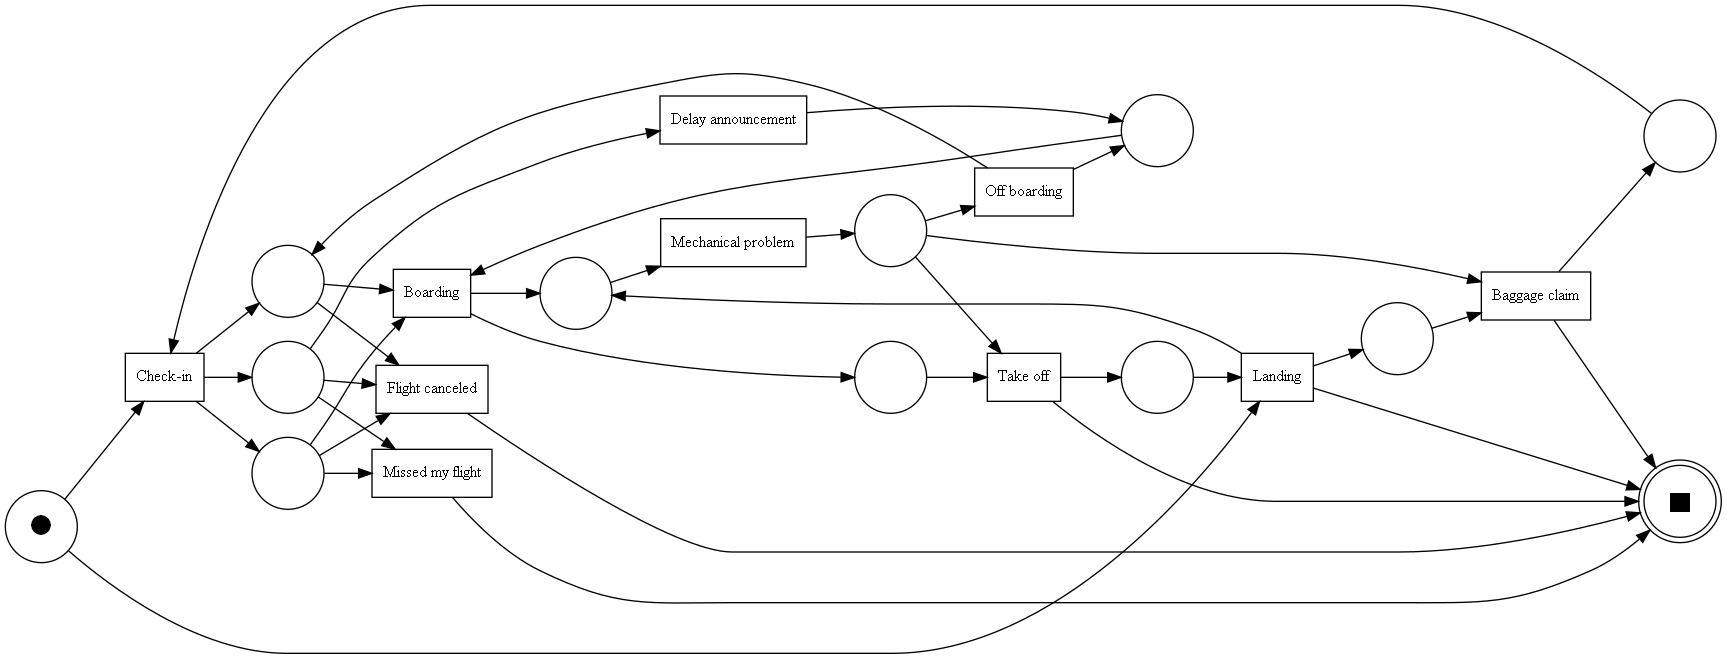

In [8]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [9]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# save the Petri net
pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

replaying log with TBR, completed variants ::   0%|          | 0/9 [00:00<?, ?it/s]

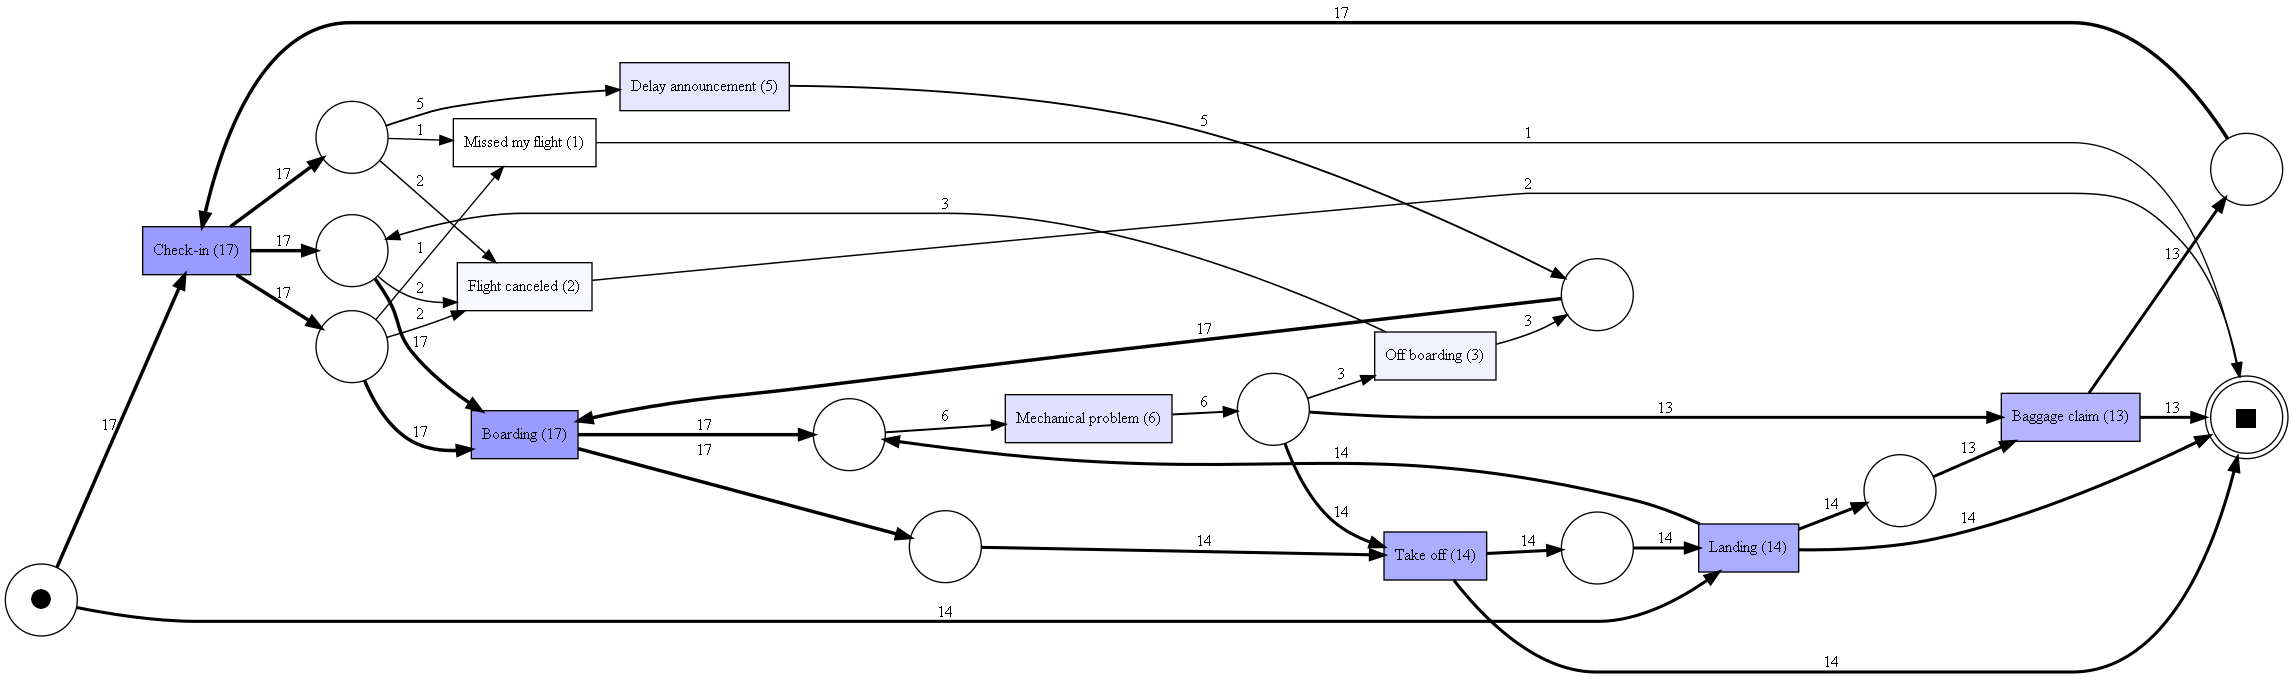

In [10]:
pn_visualizer.view(gviz)

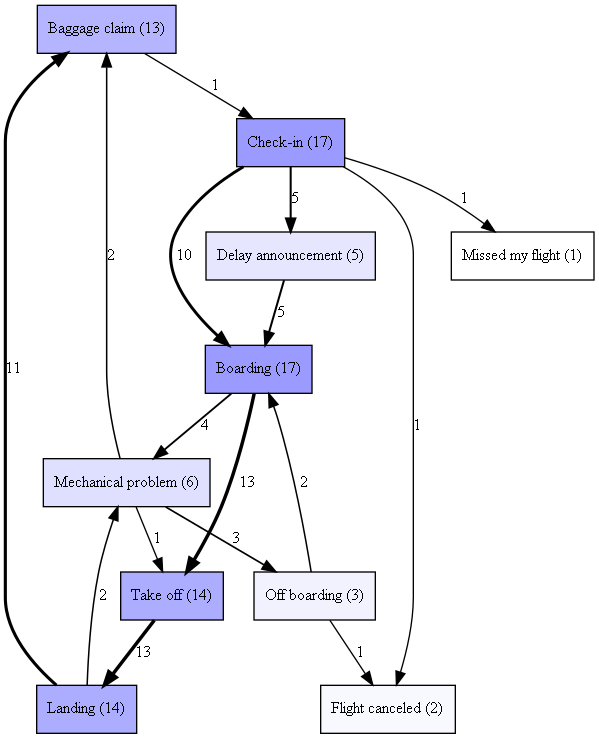

In [11]:
# creatig the graph from log
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

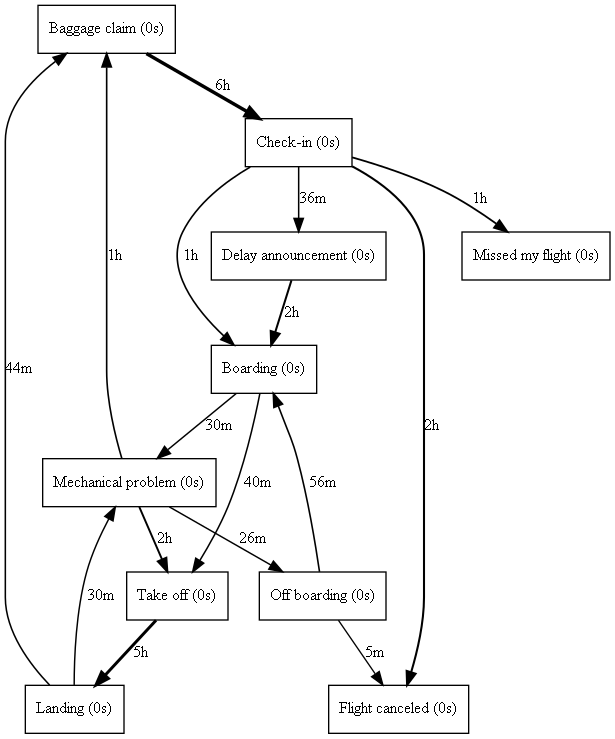

In [12]:
# creatig the graph from log
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

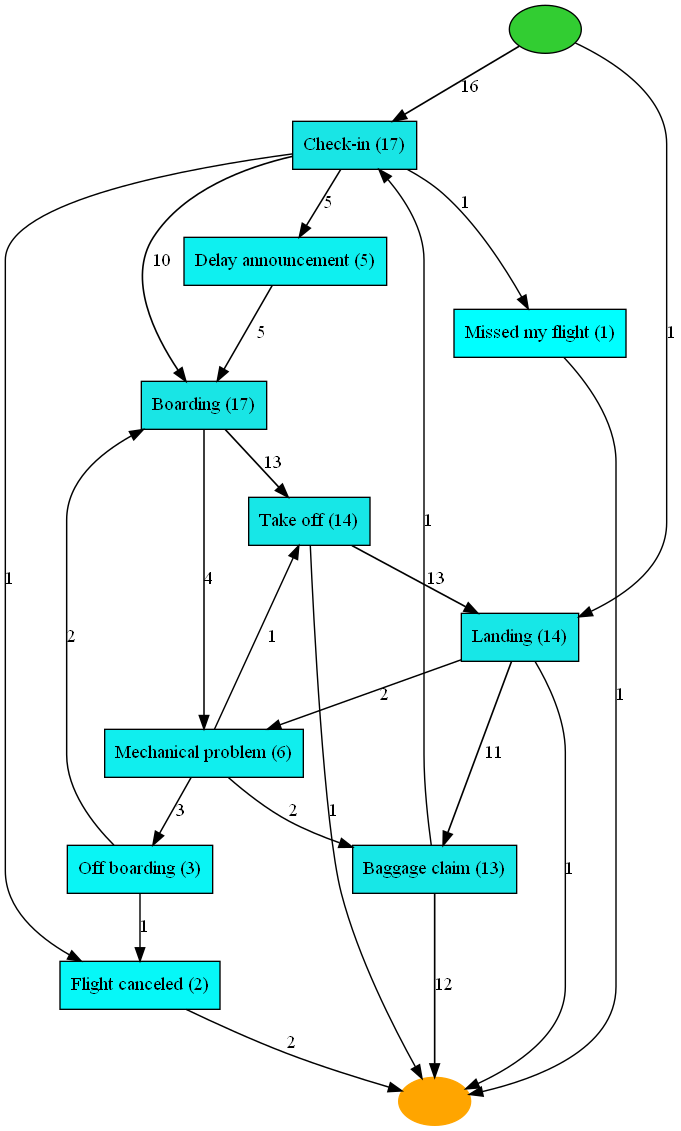

In [13]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

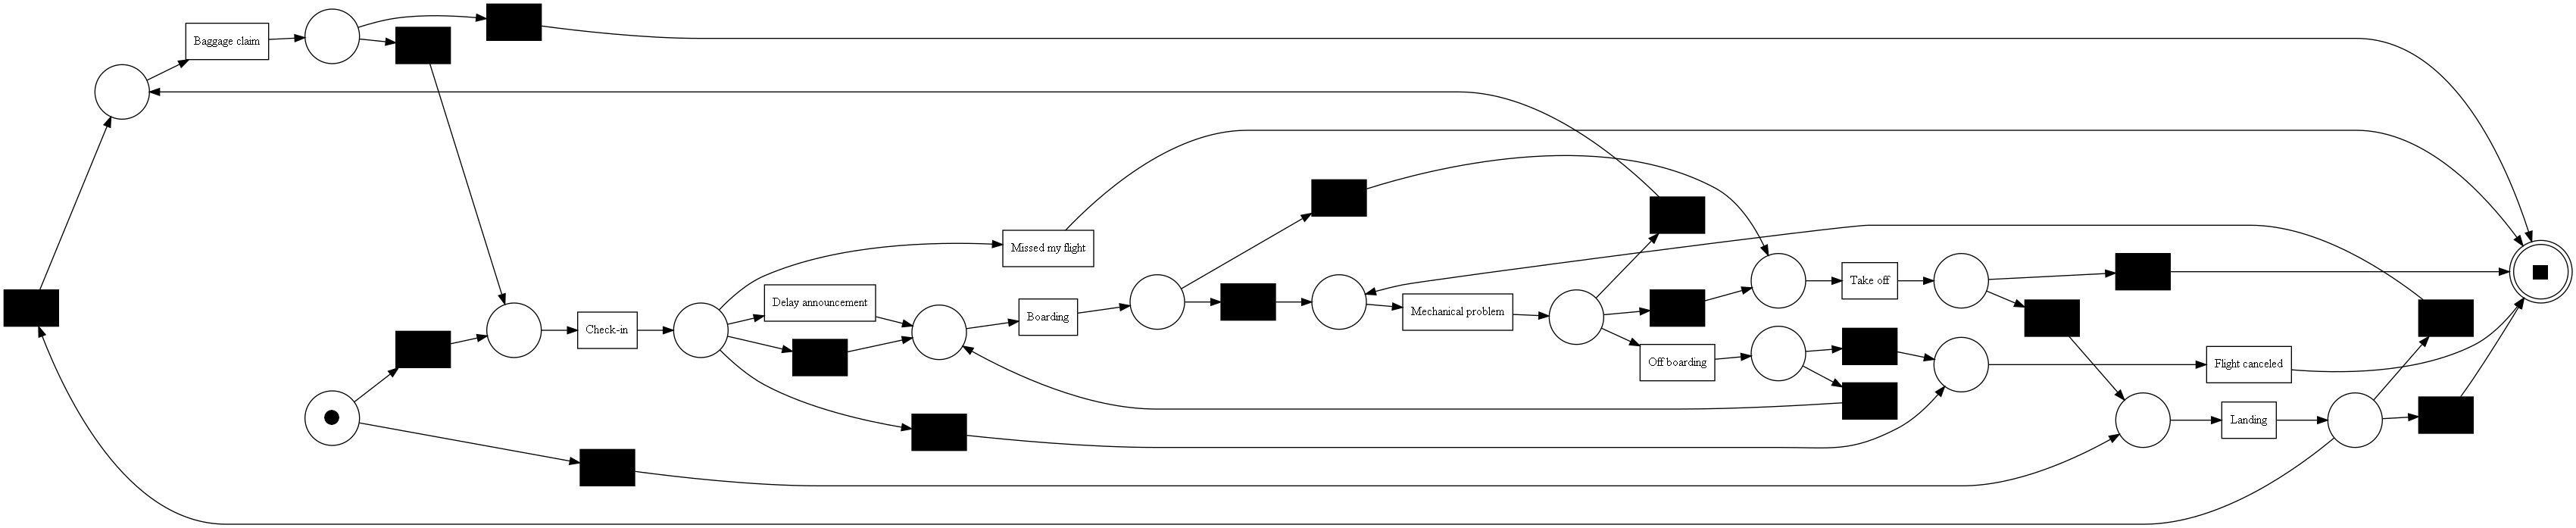

In [14]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)